# 해당 파일 설명
이 코드를 실행하기 위한 파일, /convert 경로에 다음의 파일이 필요합니다.

1. plant_train_all_weather_feature_add_cluster.csv

이 코드를 모두 실행하고 나면, /model 경로에 다음의 세 파일이 생성됩니다.

1. model_tem_in.pkl
2. model_hum_in.pkl
3. model_tem_coil.pkl

## 추가 설명
Train 데이터셋에 날씨정보와 클러스터 정보가 포함된 input을 통해 

model_tem_in, model_hum_in, model_tem_coil 을 예측하는 모형을 만듭니다.

# 1. Google drive Mount

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Define Directory

In [ ]:
# 사용하기 전 변경해주어야 하는 파라미터
BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
#BASE_WORKING_DIR = "/content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/"
USERNAME = "park"

In [ ]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
MODEL_PATH = os.path.join(BASE_WORKING_DIR, "model")
RESULT_PATH = os.path.join(BASE_WORKING_DIR, "result")

WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

print("DATA_BASE_PATH : ", DATA_BASE_PATH)
print("DATA_RAW_PATH : ", DATA_RAW_PATH)
print("DATA_EXPORT_PATH : ", DATA_EXPORT_PATH)
print("DATA_CONV_USER_PATH : ", DATA_CONV_USER_PATH)
print("DATA_CONV_PATH : ", DATA_CONV_PATH)

print("MODEL_PATH : ", MODEL_PATH)

print("RESULT_PATH : ", RESULT_PATH)

print("WORKING_DIR : ", WORKING_DIR)


Current Work Directory : /content 

Username : park 

DATA_BASE_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data
DATA_RAW_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/raw
DATA_EXPORT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/export
DATA_CONV_USER_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/park
DATA_CONV_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/converted
MODEL_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/model
RESULT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/result
WORKING_DIR :  /content/gdrive/My Drive/weather_bigcontest/4_code/park


In [ ]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))
print("===== Model List =====\n" ,check_output(["ls", MODEL_PATH]).decode("utf8"))
print("===== Result file List =====\n" ,check_output(["ls", RESULT_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 backup_0.96model
data_all.csv
data_all_out.csv
data_all_out_in.csv
date_trend.csv
date_trend_point.csv
ExtraTreesClassifier_th_10.csv
GradientBoostingClassifier_all_feature_th_40.csv
lastplus_th_10.csv
last_th_08.csv
last_th_10.csv
model
model_cond_all.pkl
model_cond_all_plus_.pkl
model_hum_in.pkl
model_hum_out_loc.pkl
model_tem_coil.pkl
model_tem_in.pkl
model_tem_out_loc.pkl
plant1_by_loc.csv
plant1_by_loc.gsheet
plant2_by_loc.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster_add_out_in.gsheet
plant_train_all_weather_feature_add_cluster.csv
predict.csv
RandomForestClassifier_th_10.csv
result.c

# 4. Import Library

In [ ]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [ ]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# interpolation 함수
import scipy.interpolate as spi

# model load
import pickle
from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

# 5. Get the Data

## 1. plant data 가져오기

In [ ]:
# plant 데이터 
data_train = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant_train_all_weather_feature_add_cluster.csv"))

# unnamed: 0 제거
data_train.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_train['date'] = data_train['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [ ]:
# train 데이터 info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

In [ ]:
# train 데이터 NULL 제거 후 info
data_train.dropna(inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

# Modeling


In [ ]:
# in을 예측하는 모델을 딕션어리로 만든다.
model_in = dict()

## 1. 사용하는 변수 정의

In [ ]:
# 훈련에 필요한 컬럼을 찾는다.
remove_list = ['mea_ddhr', 'date', 'cond_loc', 'tem_in', 'hum_in', 'tem_coil', 'tem_out_loc', 'hum_out_loc']
data_columns = list(data_train.columns)
for rmv in remove_list:
  data_columns.remove(rmv)
data_columns

['plant',
 'loc',
 'time',
 'dangjin-ta',
 'dangjin-hm',
 'dangjin-ws',
 'dangjin-rn',
 'sinpyeong-ta',
 'sinpyeong-ws',
 'sinpyeong-rn',
 'sinpyeong-lp',
 'sinpyeong-ap',
 'seosan-ta',
 'seosan-hm',
 'seosan-ws',
 'seosan-rn',
 'seosan-dew',
 'seosan-sp',
 'seosan-lp',
 'seosan-ap',
 'seosan-sr',
 'seosan-ss',
 'seosan-ground',
 'songsan-ta',
 'songsan-hm',
 'songsan-ws',
 'songsan-rn',
 'songak-ta',
 'songak-hm',
 'songak-ws',
 'songak-rn',
 'seosan-ta-trend',
 'seosan-hm-trend',
 'seosan-ground-trend',
 'seosan-ta-point',
 'seosan-hm-point',
 'seosan-ground-point',
 'seosan-ta-changed',
 'seosan-hm-changed',
 'seosan-ground-changed']

## 2. 모델 선정

In [ ]:
MLA = [
       #ensemble.AdaBoostRegressor(),
       #ensemble.BaggingRegressor(),
       ensemble.ExtraTreesRegressor(),
       #ensemble.GradientBoostingRegressor(),
       #ensemble.RandomForestRegressor(),

       #gaussian_process.GaussianProcessClassifier(),

       #linear_model.LogisticRegressionCV(),
       #linear_model.PassiveAggressiveClassifier(),
       #linear_model.RidgeClassifierCV(),
       #linear_model.SGDClassifier(),
       #linear_model.Perceptron(),

       #naive_bayes.BernoulliNB(),
       #naive_bayes.GaussianNB(),

       #svm.SVC(probability=True),
       #svm.NuSVC(probability=True),
       #svm.LinearSVC(),

       #tree.DecisionTreeClassifier(),
       #tree.ExtraTreeClassifier(),

       #discriminant_analysis.LinearDiscriminantAnalysis(),
       #discriminant_analysis.QuadraticDiscriminantAnalysis(),

       #XGBClassifier()
       #lightgbm.LGBMClassifier()
]
MLA

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)]

## 3. Training

In [ ]:
Targets = ['tem_in' ,'hum_in','tem_coil']

data_train_bin = data_columns

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)  ############### 고민해야됨!!!!!!!!!!!

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']

MLA_compares = list()
mla_index = 0
for Target in Targets:
  MLA_compare = pd.DataFrame(columns=MLA_columns)
  MLA_compares.append(MLA_compare)


  row_index = 0
  for alg in MLA:
    print(alg)
    data = copy.deepcopy(data_train)
    MLA_predict = data[Target]
    MLA_name = alg.__class__.__name__
    MLA_compares[mla_index].loc[row_index, 'MLA Name'] = MLA_name
    MLA_compares[mla_index].loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data[data_train_bin], data[Target], cv=cv_split)
    MLA_compares[mla_index].loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compares[mla_index].loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compares[mla_index].loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    alg.fit(data[data_train_bin], data[Target])
    MLA_predict[MLA_name] = alg.predict(data[data_train_bin])
    model_in[Target] = copy.deepcopy(alg)
    row_index += 1
  MLA_compares[mla_index].sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
  mla_index += 1 

for idx in range(len(Targets)):
  print(MLA_compares[idx])

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)
ExtraTreesRegressor(bootstrap=Fa

## 4. 결과 확인

In [ ]:
print('-------tem_in-----------')
print('-------------------------')
MLA_compares[0]

-------tem_in-----------
-------------------------


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.998813,5.66469e-05,222.598


0	ExtraTreesRegressor	{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...	0.999529	7.56346e-05	166.295

In [ ]:
print('-------hum_in-----------')
print('-------------------------')
MLA_compares[1]

-------hum_in-----------
-------------------------


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.98961,0.000572114,245.066


0	ExtraTreesRegressor	{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...	0.995131	0.000764236	167.843

In [ ]:
print('-------tem_coil-----------')
print('-------------------------')
MLA_compares[2]

-------tem_coil-----------
-------------------------


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.999075,2.96311e-05,224.815


0	ExtraTreesRegressor	{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...	0.999104	3.43323e-05	218.768

### 1. 변수중요도 확인

In [ ]:
def indexToCol(col, index):
  ret_list = []
  for idx in index:
    ret_list.append(col[idx])
  return ret_list

In [ ]:
model = model_in['tem_in']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("TEM_IN Feature ranking:")
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, data_train_bin[indices[f]], importances[indices[f]]))

TEM_IN Feature ranking:
1. sinpyeong-ta (0.232422)
2. dangjin-ta (0.162863)
3. seosan-ta (0.131623)
4. seosan-dew (0.106422)
5. seosan-ground (0.088995)
6. seosan-sp (0.085591)
7. seosan-ta-point (0.072409)
8. songak-ta (0.043201)
9. songsan-ta (0.023698)
10. sinpyeong-ap (0.016426)
11. seosan-ground-point (0.006900)
12. seosan-lp (0.006051)
13. loc (0.003525)
14. plant (0.002564)
15. seosan-ss (0.001945)
16. time (0.001652)
17. seosan-ground-changed (0.001315)
18. seosan-ta-changed (0.001158)
19. seosan-sr (0.001152)
20. seosan-ap (0.001054)
21. seosan-hm-trend (0.000984)
22. seosan-hm-changed (0.000951)
23. seosan-ground-trend (0.000853)
24. seosan-ta-trend (0.000813)
25. seosan-hm-point (0.000717)
26. seosan-hm (0.000639)
27. sinpyeong-lp (0.000606)
28. dangjin-hm (0.000472)
29. songak-hm (0.000471)
30. seosan-ws (0.000453)
31. dangjin-ws (0.000439)
32. songsan-hm (0.000404)
33. songsan-ws (0.000368)
34. songak-ws (0.000343)
35. sinpyeong-ws (0.000324)
36. songak-rn (0.000060)
37. s

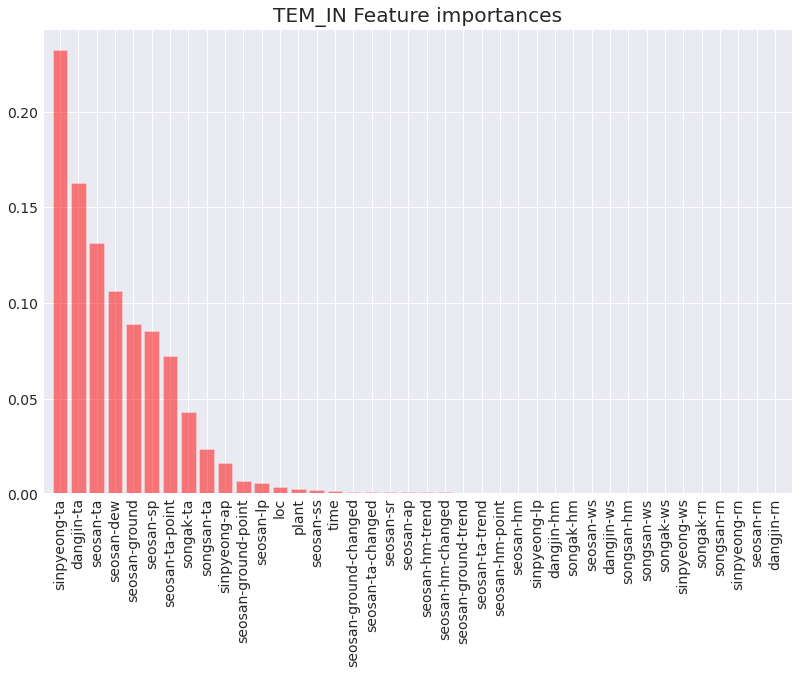

In [ ]:
# 변수 중요도 plot
sort_data_train_bin = []
for idx in indices:
  sort_data_train_bin.append(data_train_bin[idx])
sort_data_train_bin

fig = plt.figure().add_subplot()
plt.title("TEM_IN Feature importances")
plt.bar(sort_data_train_bin, importances[indices],
        color="r", alpha=0.5, align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
fig.set_xticklabels(sort_data_train_bin, rotation=90)
plt.show()

In [ ]:
model = model_in['hum_in']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("HUM_IN Feature ranking:")
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, data_train_bin[int(indices[f])], importances[indices[f]]))

HUM_IN Feature ranking:
1. dangjin-hm (0.317188)
2. seosan-hm (0.180439)
3. seosan-dew (0.094357)
4. seosan-sp (0.088052)
5. loc (0.021070)
6. seosan-hm-changed (0.020003)
7. seosan-hm-trend (0.017975)
8. plant (0.016538)
9. seosan-lp (0.016370)
10. seosan-ta-changed (0.015179)
11. seosan-ap (0.014032)
12. seosan-hm-point (0.013426)
13. seosan-ss (0.013079)
14. sinpyeong-lp (0.012662)
15. time (0.011827)
16. seosan-ground-changed (0.011157)
17. seosan-ground-point (0.010724)
18. dangjin-ta (0.010522)
19. sinpyeong-ap (0.010377)
20. seosan-ta-point (0.008889)
21. songsan-ta (0.008718)
22. seosan-ta-trend (0.008576)
23. seosan-ground-trend (0.008350)
24. seosan-ta (0.007919)
25. dangjin-ws (0.006645)
26. seosan-ground (0.006599)
27. seosan-ws (0.006180)
28. sinpyeong-ta (0.005986)
29. songak-ta (0.005282)
30. songsan-hm (0.005087)
31. songak-hm (0.004836)
32. seosan-sr (0.004728)
33. sinpyeong-ws (0.004309)
34. songsan-ws (0.003917)
35. songak-ws (0.003823)
36. seosan-rn (0.001361)
37. s

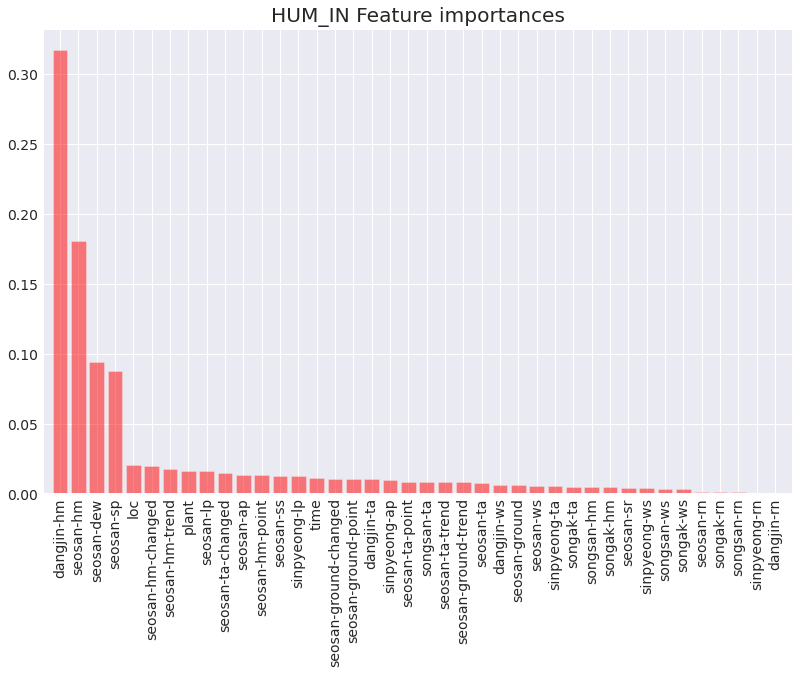

In [ ]:
# 변수 중요도 plot
sort_data_train_bin = []
for idx in indices:
  sort_data_train_bin.append(data_train_bin[idx])
sort_data_train_bin

fig = plt.figure().add_subplot()
plt.title("HUM_IN Feature importances")
plt.bar(sort_data_train_bin, importances[indices],
        color="r", alpha=0.5, align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
fig.set_xticklabels(sort_data_train_bin, rotation=90)
plt.show()

In [ ]:
model = model_in['tem_coil']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("TEM_COIL Feature ranking:")
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, data_train_bin[int(indices[f])], importances[indices[f]]))

TEM_COIL Feature ranking:
1. sinpyeong-ta (0.200113)
2. seosan-sp (0.164787)
3. seosan-dew (0.118159)
4. dangjin-ta (0.097766)
5. seosan-ta-point (0.095480)
6. seosan-ta (0.082280)
7. songsan-ta (0.074408)
8. songak-ta (0.048049)
9. seosan-ground (0.042126)
10. seosan-ground-point (0.018492)
11. sinpyeong-ap (0.012203)
12. seosan-lp (0.006685)
13. seosan-ground-changed (0.004942)
14. loc (0.004516)
15. seosan-ta-changed (0.003488)
16. seosan-hm-changed (0.003479)
17. plant (0.002808)
18. seosan-ground-trend (0.002773)
19. seosan-ta-trend (0.002721)
20. seosan-hm-trend (0.002603)
21. seosan-hm-point (0.002350)
22. sinpyeong-lp (0.001874)
23. seosan-ap (0.001844)
24. seosan-ss (0.000710)
25. songak-hm (0.000672)
26. songsan-hm (0.000597)
27. dangjin-hm (0.000581)
28. time (0.000485)
29. seosan-ws (0.000459)
30. seosan-hm (0.000455)
31. dangjin-ws (0.000442)
32. songsan-ws (0.000423)
33. songak-ws (0.000407)
34. sinpyeong-ws (0.000319)
35. seosan-sr (0.000295)
36. songak-rn (0.000071)
37.

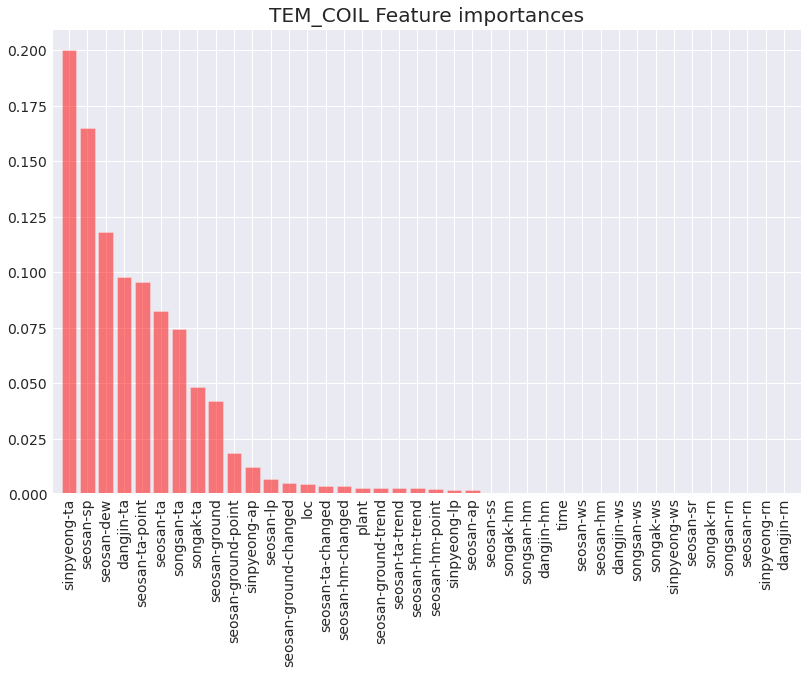

In [ ]:
# 변수 중요도 plot
sort_data_train_bin = []
for idx in indices:
  sort_data_train_bin.append(data_train_bin[idx])
sort_data_train_bin

fig = plt.figure().add_subplot()
plt.title("TEM_COIL Feature importances")
plt.bar(sort_data_train_bin, importances[indices],
        color="r", alpha=0.5, align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
fig.set_xticklabels(sort_data_train_bin, rotation=90)
plt.show()

## 5. 모델 저장하기

In [ ]:
joblib.dump(model_in['tem_in'], os.path.join(MODEL_PATH, "model_tem_in.pkl"))

['/content/gdrive/My Drive/weather_bigcontest/4_code/model/model_tem_in.pkl']

In [ ]:
joblib.dump(model_in['hum_in'], os.path.join(MODEL_PATH, "model_hum_in.pkl"))

['/content/gdrive/My Drive/weather_bigcontest/4_code/model/model_hum_in.pkl']

In [ ]:
joblib.dump(model_in['tem_coil'], os.path.join(MODEL_PATH, "model_tem_coil.pkl"))

['/content/gdrive/My Drive/weather_bigcontest/4_code/model/model_tem_coil.pkl']